In [46]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import sparse
from scipy.sparse.linalg import splu
from matplotlib import animation

In [47]:
# First we define the x and t spacing
dx = 0.001
dt = 0.01

# Then we specify the range of x and t 
x_min = -10
x_max = 10
t_max = 1

# Now we construct the x and t arrays
x = np.arange(x_min,x_max+dx,dx)
t = np.arange(0,t_max+dt,dt)

N = len(x)
J = len(t)
print(N),print(J)
# Now we define our initial wavefunction

def psi(x,b = 0.5,p_0 = 10):
    return np.sqrt(2*b)/np.sqrt(np.sqrt(2*np.pi)) * np.exp(1j*p_0*x)* np.exp(-(x)**2 *b**2)


'''
Now we define our potential 
'''
def V(x):
    vvals = []
    for i in x:
        if 2.99<= i<= 3:
            vvals.append(6000)
        else:
            vvals.append(0)
    return np.array(vvals)

20001
101


In [48]:
'''
We use the Crank-Nicholsom scheme to construct our propagator
'''
o = np.ones((N),complex)
alp = (1j)*dt/(2*dx**2)*o # alpha from (3.11)
xi = o + 1j*dt/2*(2/(dx**2)*o + V(x)) # xi from (3.11)
diags = np.array([-1,0,+1]) # positions of the vectors in the matrix
vecs1 = np.array([-alp,xi,-alp])
U1 = sparse.spdiags(vecs1,diags,N,N) # create tridiagonal sparse matrix
U1 = U1.tocsc() # convert to different sparse format needed for further calculation

o2 = np.ones((N),complex)
alp = (1j)*dt/(2*dx**2)*o # alpha from (3.11)
gum = o - 1j*dt/2*(2/(dx**2)*o + V(x)) # xi from (3.11)
diags = np.array([-1,0,+1]) # positions of the vectors in the matrix
vecs2 = np.array([alp,gum,alp])
U2 = sparse.spdiags(vecs2,diags,N,N) # create tridiagonal sparse matrix
U2 = U2.tocsc() 

In [52]:
PSI = np.zeros((N,J),complex)
PSI[:,0] = psi(x)
LU = splu(U1) # compute LU-decomposition of U1
for n in range(0,J - 1): # loop over time-steps
    b = U2.dot(PSI[:,n]) # right hand side of eq. (3.9)
    PSI[:,n + 1] = LU.solve(b)
print("Done")

Done


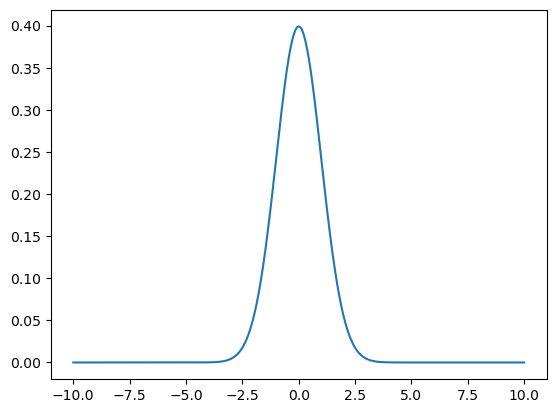